## 成交量与未平仓量


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [106]:
import pymongo
import pandas as pd
from datetime import datetime, timedelta

In [3]:
symbolList = ['btc_usdt.spot:binance', 'eth_usdt.spot:binance']

client = pymongo.MongoClient('172.16.20.81', 27017)

In [4]:
def readDb(collection, start, end):
    return pd.DataFrame(
        list(collection.find({"datetime": {'$gt': start, '$lt': end}}))
    )

In [5]:
startTime = datetime(2022,1,1)
endTime = datetime(2023,12,30)
dbClient = client['Kline_1Min_Auto_Db_Plus']
columnsName = ['open', 'high', 'low', 'close', 'volume','datetime']

In [6]:
crytoDict = {
                'btc':readDb(dbClient[symbolList[0]], start=startTime , end=endTime)[columnsName],
                'eth':readDb(dbClient[symbolList[1]], start=startTime , end=endTime)[columnsName]
            }

In [7]:
def resampleDf(data, freq='H'):
#     df = data.drop('_id', axis=1)
    dataDf = df.set_index('datetime')
    dataHourDf = dataDf.resample(freq).agg({'open':'first', 'high': 'max', 'low': 'min', 'close': 'last', 'volume':'sum'})
    dataResetDf = dataHourDf.reset_index()
    return dataResetDf

In [8]:
def addSymbol(dataDf, symbolName):  
    dataDf['symbol'] = symbolName
    return dataDf

In [9]:
def setIndex(dataDf):
    dataIndex = dataDf.set_index(['datetime', 'symbol'])
    return dataIndex

In [10]:
multiCryptoDict = {}
for key, df in crytoDict.items():
    hourDf = resampleDf(df)
    hourSymbolDf = addSymbol(hourDf, key)
    hourIndexDf = setIndex(hourSymbolDf)
    multiCryptoDict[key] = hourIndexDf

In [11]:
multiDf = pd.concat(list(multiCryptoDict.values())).sort_index()

In [12]:
multiDf

open      high       low     close  \
datetime            symbol                                           
2022-01-01 00:00:00 btc     48007.21  48118.45  47409.77  47471.66   
                    eth      3783.52   3788.45   3739.57   3745.49   
2022-01-01 01:00:00 btc     47471.67  47550.00  46889.00  47016.57   
                    eth      3745.49   3754.26   3705.00   3722.03   
2022-01-01 02:00:00 btc     47016.56  47040.52  46500.00  46686.41   
...                              ...       ...       ...       ...   
2023-01-09 11:00:00 eth      1306.15   1313.61   1304.14   1310.36   
2023-01-09 12:00:00 btc     17197.00  17253.19  17194.32  17225.08   
                    eth      1310.37   1314.73   1308.54   1310.86   
2023-01-09 13:00:00 btc     17227.11  17262.56  17200.60  17205.95   
                    eth      1310.87   1313.49   1307.81   1308.02   

                                 volume  
datetime            symbol               
2022-01-01 00:00:00 btc      1539.22684  
                    eth     10954.31820  
2022-01-01 01:00:00 btc      1962.23708  
                    eth     12687.85510  
2022-01-01 02:00:00 btc      1687.72844  
...                                 ...  
2023-01-09 11:00:00 eth     25388.01670  
2023-01-09 12:00:00 btc     10288.43227  
                    eth     19549.41600  
2023-01-09 13:00:00 btc      8152.52401  
                    eth     12018.64350  

[17932 rows x 5 columns]

In [67]:
btcOi = pd.read_csv('binance_btc_openInterest.csv')
ethOi = pd.read_csv('binance_eth_openInterest.csv')

In [68]:
btcOi.tail()

,t,t.1,v
25018,2022-12-30 02:00:00,2022-12-30 02:00:00,157284.684786
25019,2022-12-30 03:00:00,2022-12-30 03:00:00,157629.355201
25020,2022-12-30 04:00:00,2022-12-30 04:00:00,157597.488621
25021,2022-12-30 05:00:00,2022-12-30 05:00:00,157498.503101
25022,2022-12-30 06:00:00,2022-12-30 06:00:00,158524.761029


In [69]:
btcOi['datetime'] = list(map(lambda dt: datetime.strptime(dt, '%Y-%m-%d %H:%M:%S'), btcOi['t']))

In [70]:
ethOi['datetime'] = list(map(lambda dt: datetime.strptime(dt, '%Y-%m-%d %H:%M:%S'), ethOi['t']))

In [71]:
btcOi['symbol'] = 'btc'
ethOi['symbol'] = 'eth'

In [72]:
ethOi

,Unnamed: 0,t,v,datetime,symbol
0,0,2020-02-21 16:00:00,1.981815e+05,2020-02-21 16:00:00,eth
1,1,2020-02-21 17:00:00,1.978689e+05,2020-02-21 17:00:00,eth
2,2,2020-02-21 18:00:00,1.978390e+05,2020-02-21 18:00:00,eth
3,3,2020-02-21 19:00:00,1.963506e+05,2020-02-21 19:00:00,eth
4,4,2020-02-21 20:00:00,1.927776e+05,2020-02-21 20:00:00,eth
...,...,...,...,...,...
25018,25018,2022-12-30 02:00:00,1.523577e+06,2022-12-30 02:00:00,eth
25019,25019,2022-12-30 03:00:00,1.523807e+06,2022-12-30 03:00:00,eth
25020,25020,2022-12-30 04:00:00,1.519524e+06,2022-12-30 04:00:00,eth
25021,25021,2022-12-30 05:00:00,1.529066e+06,2022-12-30 05:00:00,eth


In [76]:
oiDf = pd.concat([btcOi, ethOi]).set_index(['datetime', 'symbol']).sort_index()['v'].to_frame(name='oi')

In [77]:
oiDf

oi
datetime            symbol              
2020-02-21 16:00:00 btc     2.092043e+04
                    eth     1.981815e+05
2020-02-21 17:00:00 btc     2.071485e+04
                    eth     1.978689e+05
2020-02-21 18:00:00 btc     2.085541e+04
...                                  ...
2022-12-30 04:00:00 eth     1.519524e+06
2022-12-30 05:00:00 btc     1.574985e+05
                    eth     1.529066e+06
2022-12-30 06:00:00 btc     1.585248e+05
                    eth     1.533549e+06

[50046 rows x 1 columns]

In [81]:
oiVolumeDf = pd.concat([multiDf, oiDf], axis=1).dropna()

In [91]:
shortPeriod = 168
longPeriod = shortPeriod*4

In [92]:
close = oiVolumeDf.close.unstack()
volume = oiVolumeDf.volume.unstack()
oi = oiVolumeDf.oi.unstack()

In [93]:
closeMaRatio = close.rolling(shortPeriod).mean()/close.rolling(longPeriod).mean().shift(shortPeriod)
volumeMaRatio = volume.rolling(shortPeriod).mean()/volume.rolling(longPeriod).mean().shift(shortPeriod)
oiMaRatio = oi.rolling(shortPeriod).mean()/oi.rolling(longPeriod).mean().shift(shortPeriod)

In [127]:
def cal_pctChange(data, lastDay, periodList=[7]):
    pctChangeDict = {}
    for period in periodList:
        pctChangeDict[str(period)+'Day'] = round((data.loc[lastDay]/data.loc[lastDay-timedelta(hours=period*24)]-1)*100, 2)
    pctChangeDf = pd.Series(pctChangeDict)
    return pctChangeDf

In [128]:
maChangeDf = pd.DataFrame({
    'btcCloseMaChange': cal_pctChange(closeMaRatio.btc, datetime(2022,12,30), [1, 3, 5, 8, 13]),
    'ethCloseMaChange': cal_pctChange(closeMaRatio.eth, datetime(2022,12,30), [1, 3, 5, 8, 13]),
    'btcVolumeMaChange': cal_pctChange(volumeMaRatio.btc, datetime(2022,12,30), [1, 3, 5, 8, 13]),
    'ethVolumeMaChange': cal_pctChange(volumeMaRatio.eth, datetime(2022,12,30), [1, 3, 5, 8, 13]),   
    'btcOpenInterestMaChange': cal_pctChange(oiMaRatio.btc, datetime(2022,12,30), [1, 3, 5, 8, 13]),
    'ethOpenInterestMaChange': cal_pctChange(oiMaRatio.eth, datetime(2022,12,30), [1, 3, 5, 8, 13]),
})

In [129]:
maChangeDf.T

,1Day,3Day,5Day,8Day,13Day
btcCloseMaChange,-0.22,-0.54,-0.48,-1.91,-4.69
ethCloseMaChange,-0.23,-0.53,0.24,-0.98,-6.29
btcVolumeMaChange,2.57,-6.33,-7.64,-29.80,-37.53
ethVolumeMaChange,3.44,-6.09,-9.97,-42.58,-38.48
btcOpenInterestMaChange,1.89,5.50,6.87,6.93,1.63
ethOpenInterestMaChange,0.92,2.75,3.60,3.15,-3.85


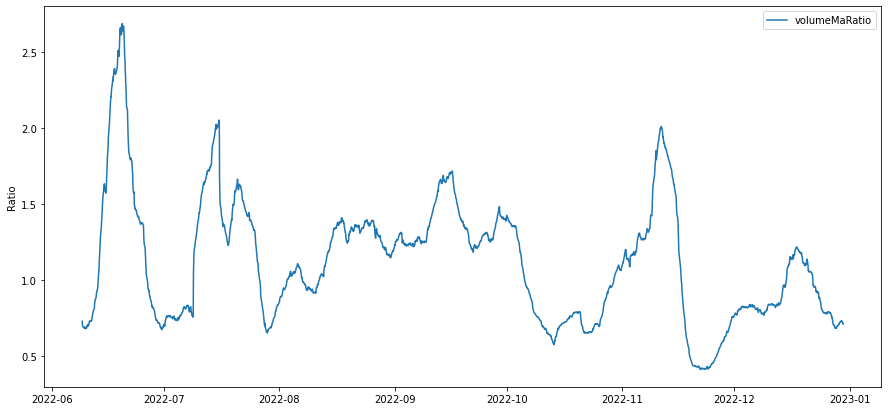

In [121]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
# plt.plot(closeMaDiffNor.btc.iloc[-7:])
plt.plot(volumeMaRatio.btc.iloc[-4900:])
plt.ylabel('Ratio')
plt.legend(['volumeMaRatio'])
plt.show()

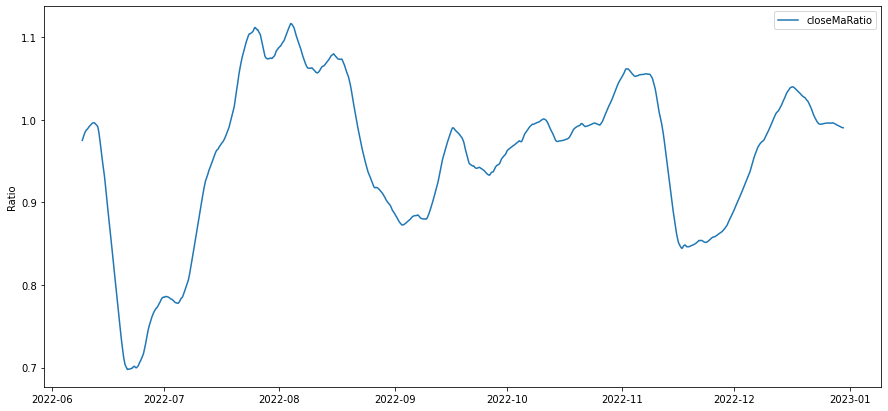

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
# plt.plot(closeMaDiffNor.btc.iloc[-7:])
plt.plot(closeMaRatio.btc.iloc[-4900:])
plt.ylabel('Ratio')
plt.legend(['closeMaRatio'])
plt.show()

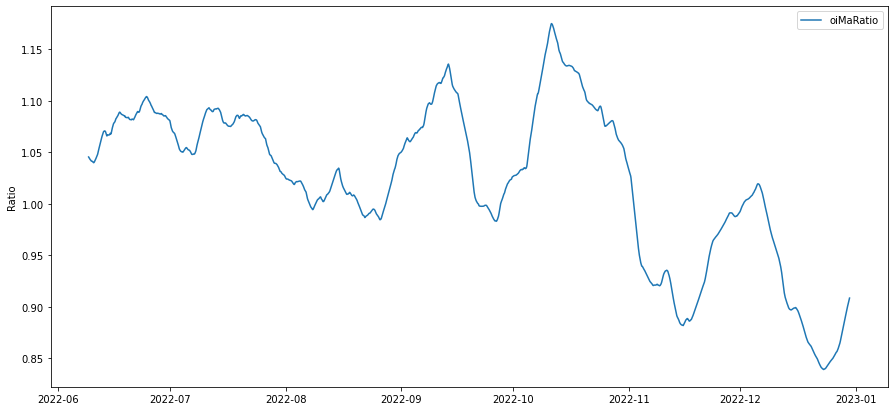

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
# plt.plot(closeMaDiffNor.btc.iloc[-7:])
plt.plot(oiMaRatio.btc.iloc[-4900:])
plt.ylabel('Ratio')
plt.legend(['oiMaRatio'])
plt.show()